# Import libraries and data upload

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.stats import skew, kurtosis
from sklearn.preprocessing import LabelEncoder

In [2]:
train = pd.read_csv(r'C:\Users\USER\OneDrive\Documents\Property_prices_predictions\train.csv')
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

# Data cleaning

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [5]:
train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

### Missigness

In [6]:
(train.isna().sum().sort_values().tail(10) / len(train)) * 100

GarageFinish     5.547945
GarageType       5.547945
GarageCond       5.547945
LotFrontage     17.739726
FireplaceQu     47.260274
MasVnrType      59.726027
Fence           80.753425
Alley           93.767123
MiscFeature     96.301370
PoolQC          99.520548
dtype: float64

In [7]:
# drop columns with than more 50% NaN
train.drop(columns = ['MasVnrType','Fence','Alley','MiscFeature','PoolQC'],inplace = True )

### Missingness in FireplaceQu

In [8]:
fire_mask = []
for i in train.columns:
    if i.startswith("Fire"):
        fire_mask.append(i)

fire_mask = train[fire_mask]

In [9]:
fire_mask

Fireplaces FireplaceQu
0              0         NaN
1              1          TA
2              1          TA
3              1          Gd
4              1          TA
...          ...         ...
1455           1          TA
1456           2          TA
1457           2          Gd
1458           0         NaN
1459           0         NaN

[1460 rows x 2 columns]

In [10]:
fire_mask[fire_mask['FireplaceQu'].isna()]

Fireplaces FireplaceQu
0              0         NaN
5              0         NaN
10             0         NaN
12             0         NaN
15             0         NaN
...          ...         ...
1452           0         NaN
1453           0         NaN
1454           0         NaN
1458           0         NaN
1459           0         NaN

[690 rows x 2 columns]

All NaN values occur because there are 0 fireplaces in those houses.

In [11]:
def fill_missing(column , value ):
    if column in train.columns :
        train.fillna({ column : value } , inplace = True)
        print(f"Missing values in column {column} is replaced by {value}")
    else :
        print(f"column {column} does not exist")

fill_missing('FireplaceQu', "Zero")

Missing values in column FireplaceQu is replaced by Zero


### Missingness in GarageFinish, GarageQual, GarageCond, GarageYrBlt, GarageType

In [12]:
garage_mask = []
for i in train.columns :
    if i.startswith("Garage"):
        garage_mask.append(i)
garage_mask

['GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond']

In [13]:
garage_mask= train[garage_mask]
garage_mask

GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual  \
0        Attchd       2003.0          RFn           2         548         TA   
1        Attchd       1976.0          RFn           2         460         TA   
2        Attchd       2001.0          RFn           2         608         TA   
3        Detchd       1998.0          Unf           3         642         TA   
4        Attchd       2000.0          RFn           3         836         TA   
...         ...          ...          ...         ...         ...        ...   
1455     Attchd       1999.0          RFn           2         460         TA   
1456     Attchd       1978.0          Unf           2         500         TA   
1457     Attchd       1941.0          RFn           1         252         TA   
1458     Attchd       1950.0          Unf           1         240         TA   
1459     Attchd       1965.0          Fin           1         276         TA   

     GarageCond  
0            TA  
1            TA  
2            TA  
3            TA  
4            TA  
...         ...  
1455         TA  
1456         TA  
1457         TA  
1458         TA  
1459         TA  

[1460 rows x 7 columns]

In [14]:
garage_mask[garage_mask["GarageType"].isna()]

GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual  \
39          NaN          NaN          NaN           0           0        NaN   
48          NaN          NaN          NaN           0           0        NaN   
78          NaN          NaN          NaN           0           0        NaN   
88          NaN          NaN          NaN           0           0        NaN   
89          NaN          NaN          NaN           0           0        NaN   
...         ...          ...          ...         ...         ...        ...   
1349        NaN          NaN          NaN           0           0        NaN   
1407        NaN          NaN          NaN           0           0        NaN   
1449        NaN          NaN          NaN           0           0        NaN   
1450        NaN          NaN          NaN           0           0        NaN   
1453        NaN          NaN          NaN           0           0        NaN   

     GarageCond  
39          NaN  
48          NaN  
78          NaN  
88          NaN  
89          NaN  
...         ...  
1349        NaN  
1407        NaN  
1449        NaN  
1450        NaN  
1453        NaN  

[81 rows x 7 columns]

All values in these columns are zeros.

In [15]:
garage_mask[garage_mask["GarageType"].isna()][['GarageCars','GarageArea']].sum()

GarageCars    0
GarageArea    0
dtype: int64

In [16]:
fill_missing('GarageType', "NF")
fill_missing('GarageFinish', "NF")
fill_missing('GarageQual', "NF")
fill_missing('GarageCond', "NF")
fill_missing('GarageYrBlt', 0)
fill_missing('GarageCars', 0)
fill_missing('GarageArea', 0)

Missing values in column GarageType is replaced by NF
Missing values in column GarageFinish is replaced by NF
Missing values in column GarageQual is replaced by NF
Missing values in column GarageCond is replaced by NF
Missing values in column GarageYrBlt is replaced by 0
Missing values in column GarageCars is replaced by 0
Missing values in column GarageArea is replaced by 0


### Missingness in Bsmt

In [17]:
Bsmnt_mask = []
for i in train.columns :
    if i.startswith("Bsmt"):
        Bsmnt_mask.append(i)
Bsmnt_mask

['BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'BsmtFullBath',
 'BsmtHalfBath']

In [18]:
Bsmnt_mask= train[Bsmnt_mask]
Bsmnt_mask.isna().sum()

BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinSF1       0
BsmtFinType2    38
BsmtFinSF2       0
BsmtUnfSF        0
BsmtFullBath     0
BsmtHalfBath     0
dtype: int64

In [19]:
Bsmnt_mask[(Bsmnt_mask['BsmtExposure'].isna()) & (Bsmnt_mask['BsmtCond'].isna()== False)]

BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  \
948       Gd       TA          NaN          Unf           0          Unf   

     BsmtFinSF2  BsmtUnfSF  BsmtFullBath  BsmtHalfBath  
948           0        936             0             0

Only this column’s missing value is not related to the others, so we'll fill it with the mode

In [20]:
BsmtExposure_mode = train['BsmtExposure'].mode()[0]
BsmtExposure_mode

'No'

In [21]:
train.loc[948 , 'BsmtExposure']= BsmtExposure_mode

In [22]:
Bsmnt_mask[(Bsmnt_mask['BsmtFinType2'].isna()) & (Bsmnt_mask['BsmtCond'].isna()== False)]

BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  \
332       Gd       TA           No          GLQ        1124          NaN   

     BsmtFinSF2  BsmtUnfSF  BsmtFullBath  BsmtHalfBath  
332         479       1603             1             0

Only this column’s missing value is not related to the others, so we'll fill it with the mode

In [23]:
BsmtFinType2_mode = train['BsmtFinType2'].mode()[0]
train.loc[332 , 'BsmtFinType2']= BsmtFinType2_mode

In [24]:
Bsmnt_mask = []
for i in train.columns :
    if i.startswith("Bsmt"):
        Bsmnt_mask.append(i)

Bsmnt_mask= train[Bsmnt_mask]
Bsmnt_mask.isna().sum()

BsmtQual        37
BsmtCond        37
BsmtExposure    37
BsmtFinType1    37
BsmtFinSF1       0
BsmtFinType2    37
BsmtFinSF2       0
BsmtUnfSF        0
BsmtFullBath     0
BsmtHalfBath     0
dtype: int64

In [25]:
Bsmnt_mask[Bsmnt_mask["BsmtQual"].isna()][['BsmtFinSF1','BsmtFinSF2']].sum()

BsmtFinSF1    0
BsmtFinSF2    0
dtype: int64

The missing values in these columns exist because those houses do not have a basement.

In [26]:
fill_missing('BsmtQual', "NF")
fill_missing('BsmtCond', "NF")
fill_missing('BsmtExposure', "NF")
fill_missing('BsmtFinType1', "NF")
fill_missing('BsmtFinType2', "NF")

Missing values in column BsmtQual is replaced by NF
Missing values in column BsmtCond is replaced by NF
Missing values in column BsmtExposure is replaced by NF
Missing values in column BsmtFinType1 is replaced by NF
Missing values in column BsmtFinType2 is replaced by NF


### Missingness in Electrical

In [27]:
train[train['Electrical'].isna()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
1379  1380          80       RL         73.0     9735   Pave      Reg   

     LandContour Utilities LotConfig  ... EnclosedPorch 3SsnPorch ScreenPorch  \
1379         Lvl    AllPub    Inside  ...             0         0           0   

     PoolArea MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
1379        0       0      5    2008        WD         Normal     167500  

[1 rows x 76 columns]

There is only one missing value, so we'll fill it with the mode

In [28]:
Electrical_mode = train['Electrical'].mode()[0]
train.loc[1379 , 'Electrical']= Electrical_mode

### Missingness in MasVnrArea

In [29]:
train[train['MasVnrArea'].isna()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
234    235          60       RL          NaN     7851   Pave      Reg   
529    530          20       RL          NaN    32668   Pave      IR1   
650    651          60       FV         65.0     8125   Pave      Reg   
936    937          20       RL         67.0    10083   Pave      Reg   
973    974          20       FV         95.0    11639   Pave      Reg   
977    978         120       FV         35.0     4274   Pave      IR1   
1243  1244          20       RL        107.0    13891   Pave      Reg   
1278  1279          60       RL         75.0     9473   Pave      Reg   

     LandContour Utilities LotConfig  ... EnclosedPorch 3SsnPorch ScreenPorch  \
234          Lvl    AllPub    Inside  ...             0         0           0   
529          Lvl    AllPub   CulDSac  ...           200         0           0   
650          Lvl    AllPub    Inside  ...             0         0           0   
936          Lvl    AllPub    Inside  ...             0         0           0   
973          Lvl    AllPub    Corner  ...             0         0           0   
977          Lvl    AllPub    Inside  ...             0         0           0   
1243         Lvl    AllPub    Inside  ...             0         0           0   
1278         Lvl    AllPub    Inside  ...             0         0           0   

     PoolArea MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
234         0       0      5    2010        WD         Normal     216500  
529         0       0      3    2007        WD         Alloca     200624  
650         0       0      5    2008        WD         Normal     205950  
936         0       0      8    2009        WD         Normal     184900  
973         0       0     12    2008       New        Partial     182000  
977         0       0     11    2007       New        Partial     199900  
1243        0       0      9    2006       New        Partial     465000  
1278        0       0      3    2008        WD         Normal     237000  

[8 rows x 76 columns]

In [30]:
(train['MasVnrArea'].value_counts()/len(train))*100

MasVnrArea
0.0      58.972603
108.0     0.547945
72.0      0.547945
180.0     0.547945
16.0      0.479452
           ...    
426.0     0.068493
96.0      0.068493
438.0     0.068493
194.0     0.068493
119.0     0.068493
Name: count, Length: 327, dtype: float64

The percentage of zeros in this column is over 58%, so we'll fill the 8 missing values with 0

In [31]:
train['MasVnrArea'].fillna(train['MasVnrArea'].median(), inplace= True)

C:\Users\USER\AppData\Local\Temp\ipykernel_13548\2731589714.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['MasVnrArea'].fillna(train['MasVnrArea'].median(), inplace= True)


### Missingness in LotFrontage

In [32]:
Lot_mask = []
for i in train.columns :
    if i.startswith("Lot"):
        Lot_mask.append(i)

Lot_mask= train[Lot_mask]
Lot_mask.isna().sum()

LotFrontage    259
LotArea          0
LotShape         0
LotConfig        0
dtype: int64

There is no reliable way to determine the LotFrontage value, so we'll fill it with the mean, since it is normally distributed.

In [33]:
LotFrontage_mean = train['LotFrontage'].mean()
fill_missing('LotFrontage', LotFrontage_mean)

Missing values in column LotFrontage is replaced by 70.04995836802665


In [34]:
(train.isna().sum().sort_values().tail(10) / len(train)) * 100

EnclosedPorch    0.0
3SsnPorch        0.0
ScreenPorch      0.0
PoolArea         0.0
MiscVal          0.0
MoSold           0.0
YrSold           0.0
SaleType         0.0
SaleCondition    0.0
SalePrice        0.0
dtype: float64

Finally, there are no missing values remaining in the dataset.

## Duplicates

In [35]:
train.duplicated().sum()

np.int64(0)

There are no duplicate values in the dataset.

# EDA

## Univeriate

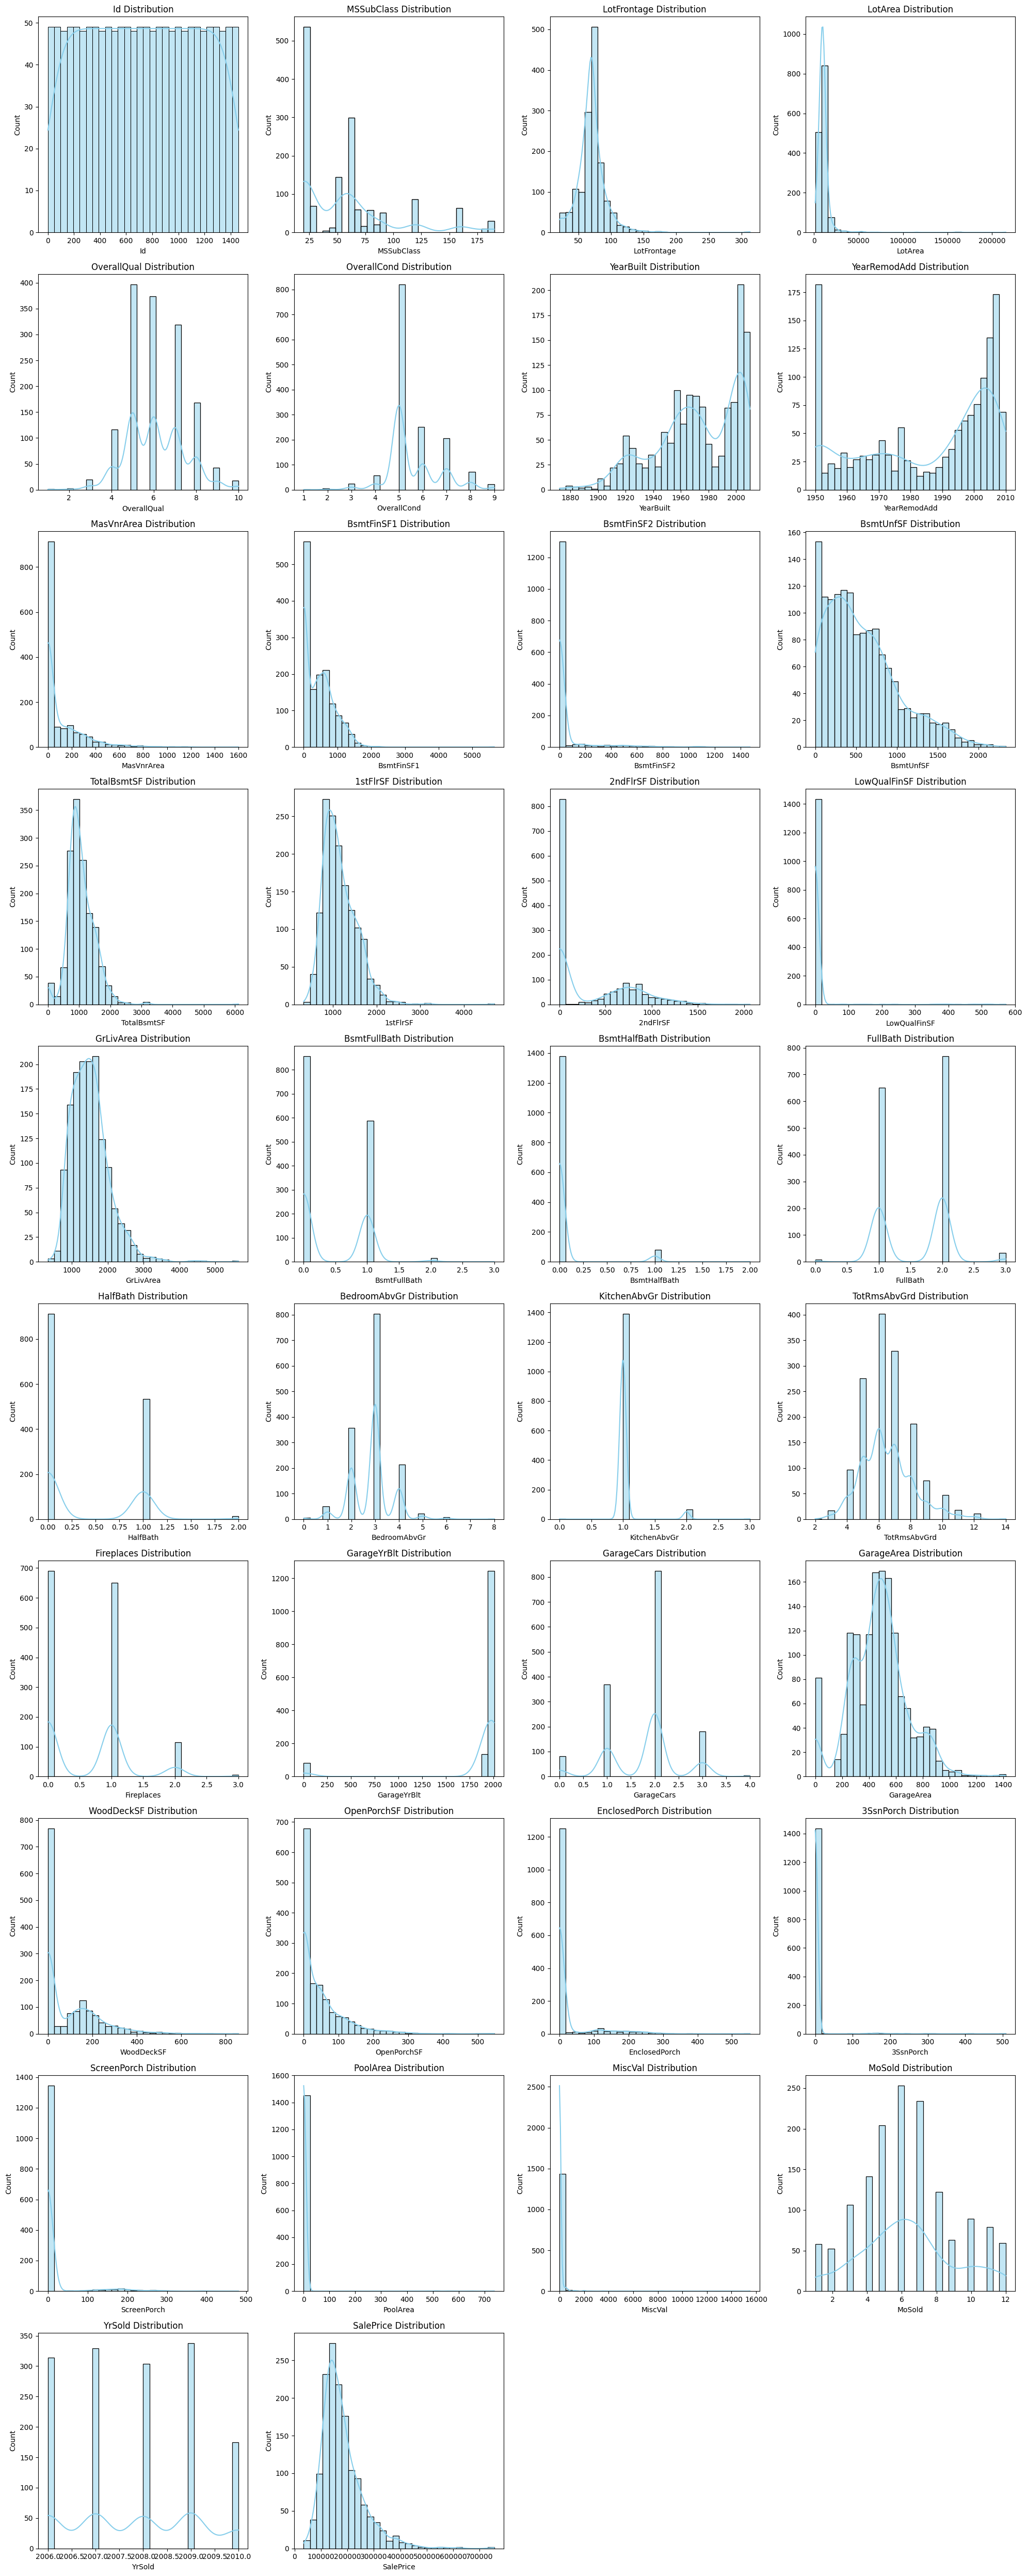

In [36]:
# numeric columns distribution
num_cols = train.select_dtypes(include=np.number).columns.tolist()
cols_per_row = 4
num_plots = len(num_cols)
rows = int(np.ceil(num_plots / cols_per_row))

plt.figure(figsize=(20, 5 * rows))

for i, col in enumerate(num_cols, 1):
    plt.subplot(rows, cols_per_row, i)
    sns.histplot(train[col].dropna(), kde=True, bins=30, color='skyblue')
    plt.title(f'{col} Distribution')
    plt.tight_layout()

plt.show()

In [47]:
# Check skewness and kurtosis
skew_kurt = pd.DataFrame({
    'Skewness': train[num_cols].apply(lambda x: skew(x.dropna())),
    'Kurtosis': train[num_cols].apply(lambda x: kurtosis(x.dropna()))
}).sort_values(by='Skewness', ascending=False)

skew_kurt.head(20)

Skewness    Kurtosis
MiscVal        24.451640  698.600840
PoolArea       14.813135  222.500507
LotArea        12.195142  202.543793
3SsnPorch      10.293752  123.235177
LowQualFinSF    9.002080   82.945932
KitchenAbvGr    4.483784   21.454627
BsmtFinSF2      4.250888   20.040415
ScreenPorch     4.117977   18.371874
BsmtHalfBath    4.099186   16.336436
EnclosedPorch   3.086696   10.390972
MasVnrArea      2.674865   10.102612
LotFrontage     2.382499   21.769308
OpenPorchSF     2.361912    8.457180
SalePrice       1.880941    6.509812
BsmtFinSF1      1.683771   11.076090
WoodDeckSF      1.539792    2.978604
TotalBsmtSF     1.522688   13.201042
MSSubClass      1.406210    1.570675
1stFlrSF        1.375342    5.722076
GrLivArea       1.365156    4.874266

In [49]:
# log transformation
log_cols = ['SalePrice', 'LotArea', 'LotFrontage', 'MasVnrArea', 
            'OpenPorchSF', 'EnclosedPorch', 'BsmtFinSF1', 
            'WoodDeckSF', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea']

for col in log_cols:
    train[col] = np.log1p(train[col])

# Binary conversion for mostly-zero features
zero_heavy = ['MiscVal', 'PoolArea', '3SsnPorch', 'LowQualFinSF',
              'BsmtFinSF2', 'BsmtHalfBath']
for col in zero_heavy:
    train[col] = (train[col] > 0).astype(int)

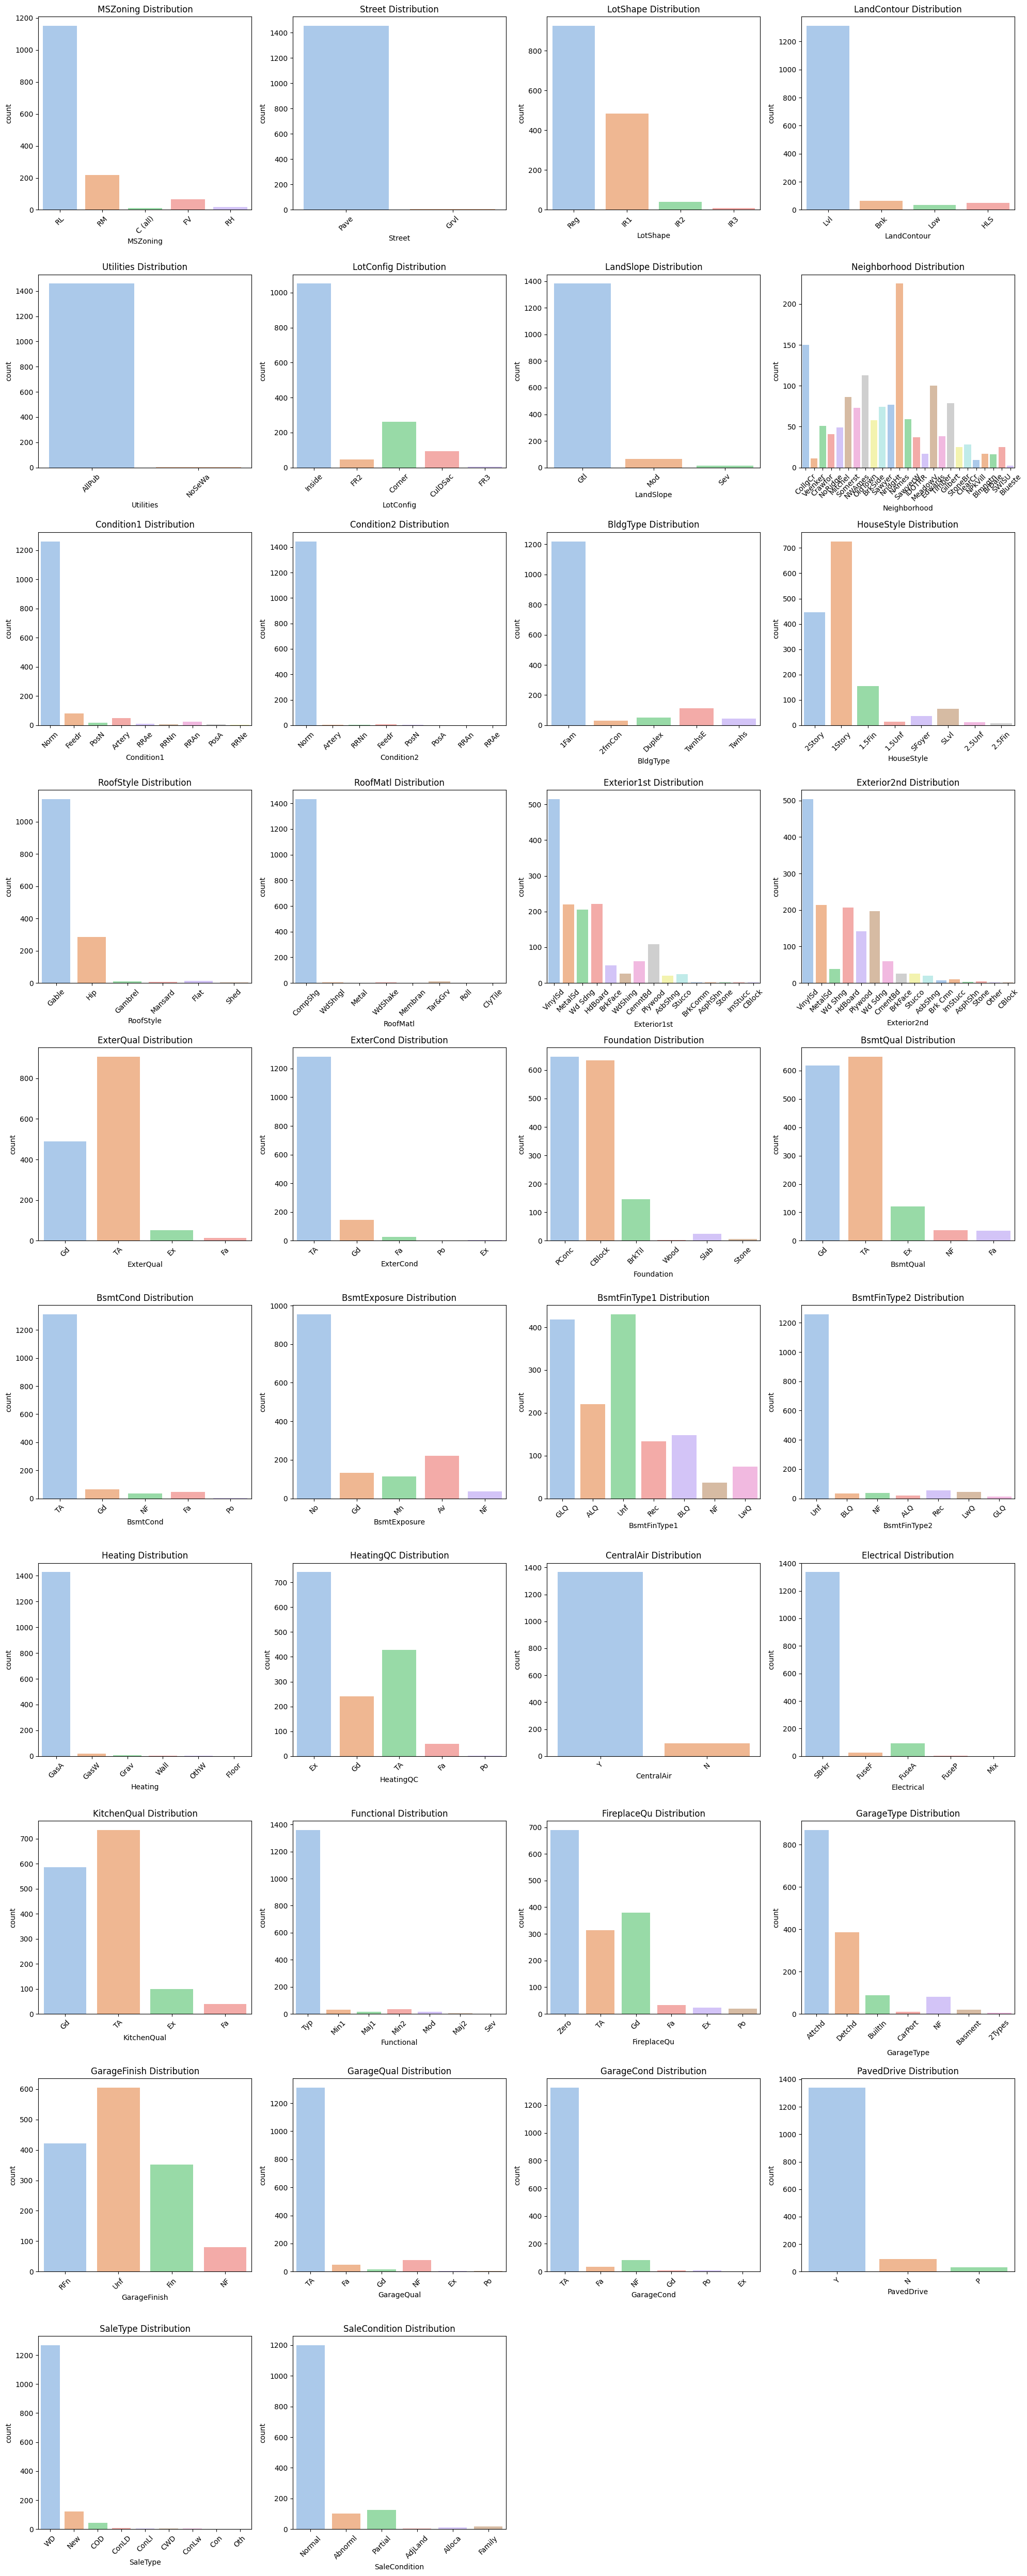

In [37]:
# categorical columns
cat_cols = train.select_dtypes(include=['object']).columns
cols_per_row = 4
num_plots = len(cat_cols)
rows = int(np.ceil(num_plots / cols_per_row))

plt.figure(figsize=(20, 5 * rows))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(rows, cols_per_row, i)
    sns.countplot(data=train, x=col, hue=col, palette='pastel', legend=False)
    plt.title(f'{col} Distribution')
    plt.xticks(rotation=45)
    plt.tight_layout()
plt.show()

## Biveriate analysis

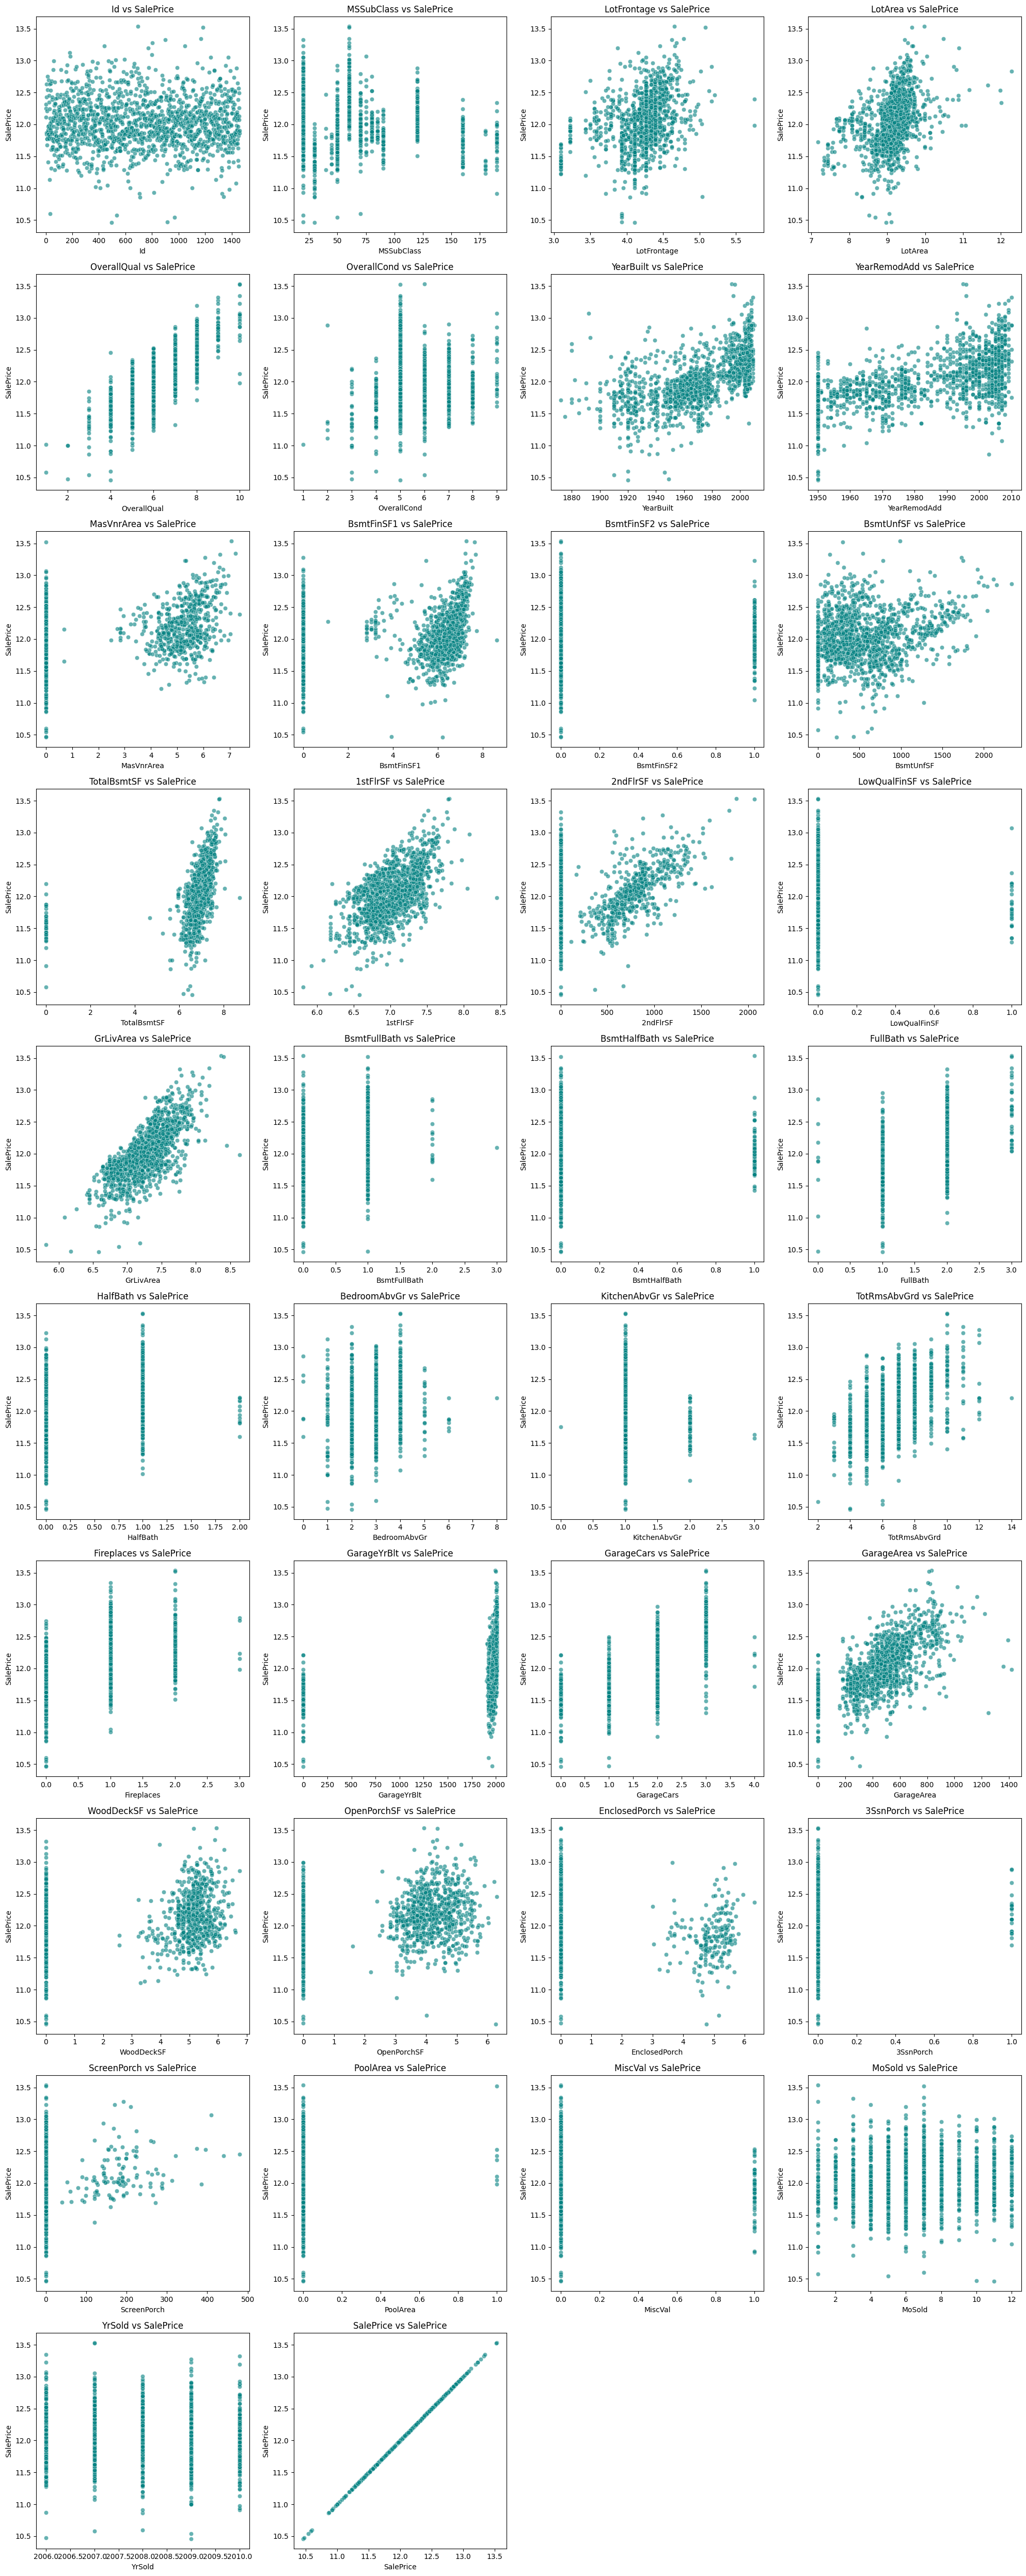

In [51]:
# Numerical vs Target
cols_per_row = 4
num_plots = len(num_cols)
rows = int(np.ceil(num_plots / cols_per_row))

plt.figure(figsize=(20, 5 * rows))
for i, col in enumerate(num_cols, 1):
    plt.subplot(rows, cols_per_row, i)
    sns.scatterplot(data=train, x=col, y='SalePrice', color='teal', alpha=0.6)
    plt.title(f'{col} vs SalePrice')
plt.tight_layout()
plt.show()

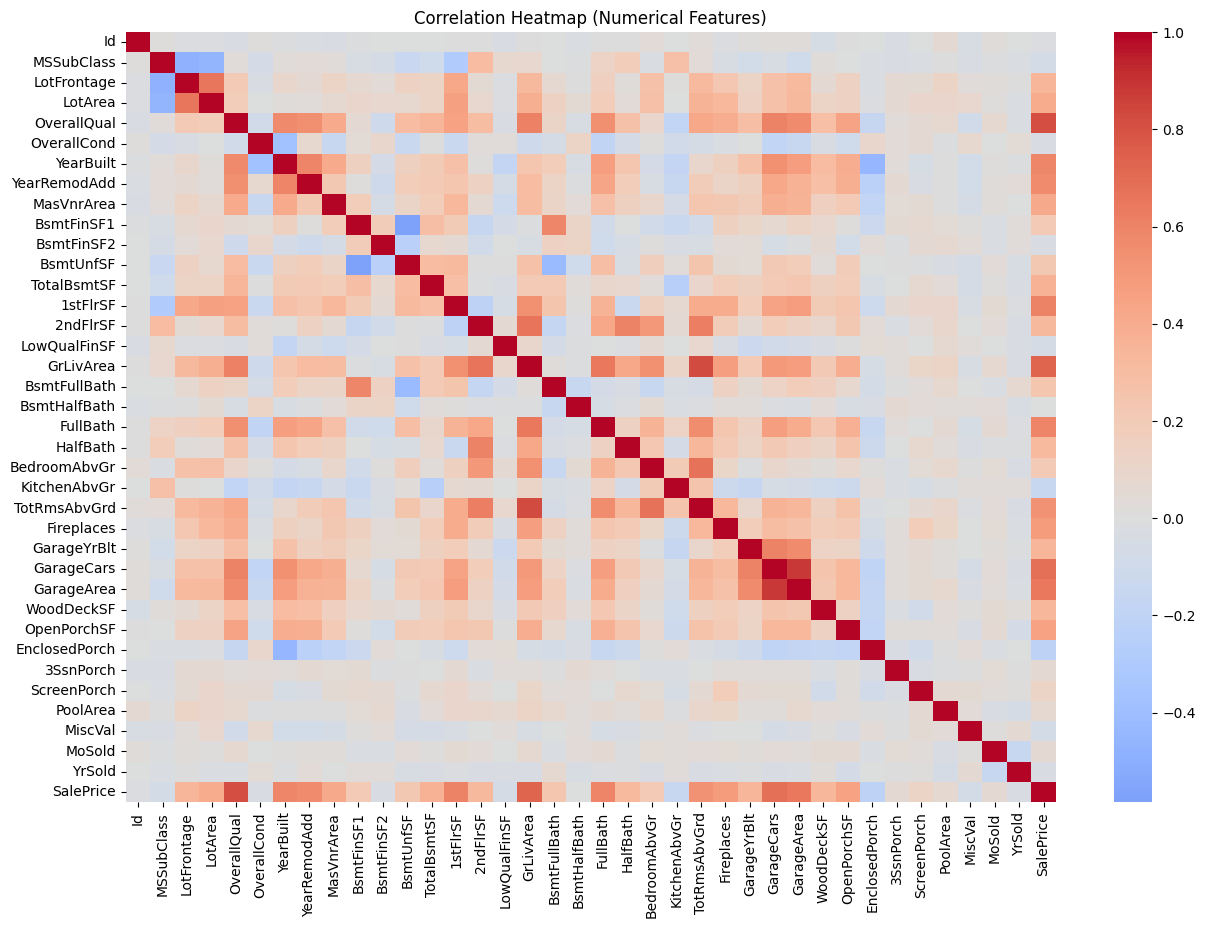

In [52]:
# correlation matrix
corr = train.corr(numeric_only=True)
plt.figure(figsize=(15, 10))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap (Numerical Features)')
plt.show()

In [53]:
corr.SalePrice.sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.817185
GrLivArea        0.730254
GarageCars       0.680625
GarageArea       0.650888
1stFlrSF         0.608955
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
TotRmsAbvGrd     0.534422
Fireplaces       0.489450
OpenPorchSF      0.459948
MasVnrArea       0.413318
LotArea          0.399923
TotalBsmtSF      0.372838
GarageYrBlt      0.349013
LotFrontage      0.346668
WoodDeckSF       0.343039
2ndFlrSF         0.319300
HalfBath         0.313982
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209043
BsmtFinSF1       0.208099
ScreenPorch      0.121208
PoolArea         0.069835
3SsnPorch        0.057857
MoSold           0.057330
BsmtHalfBath    -0.004477
Id              -0.017942
BsmtFinSF2      -0.034682
OverallCond     -0.036868
YrSold          -0.037263
LowQualFinSF    -0.056995
MiscVal         -0.073430
MSSubClass      -0.073959
KitchenAbvGr    -0.147548
EnclosedPorch   -0.207263
Name: SalePr

some strong correlations to SalePrice:
- OverallQual (81%)
- TotalBsmtSF (73%)
- 1stFlrSF (68%)
- GrLivArea (65%)
- GarageCars (60%)
- GarageArea (59%)

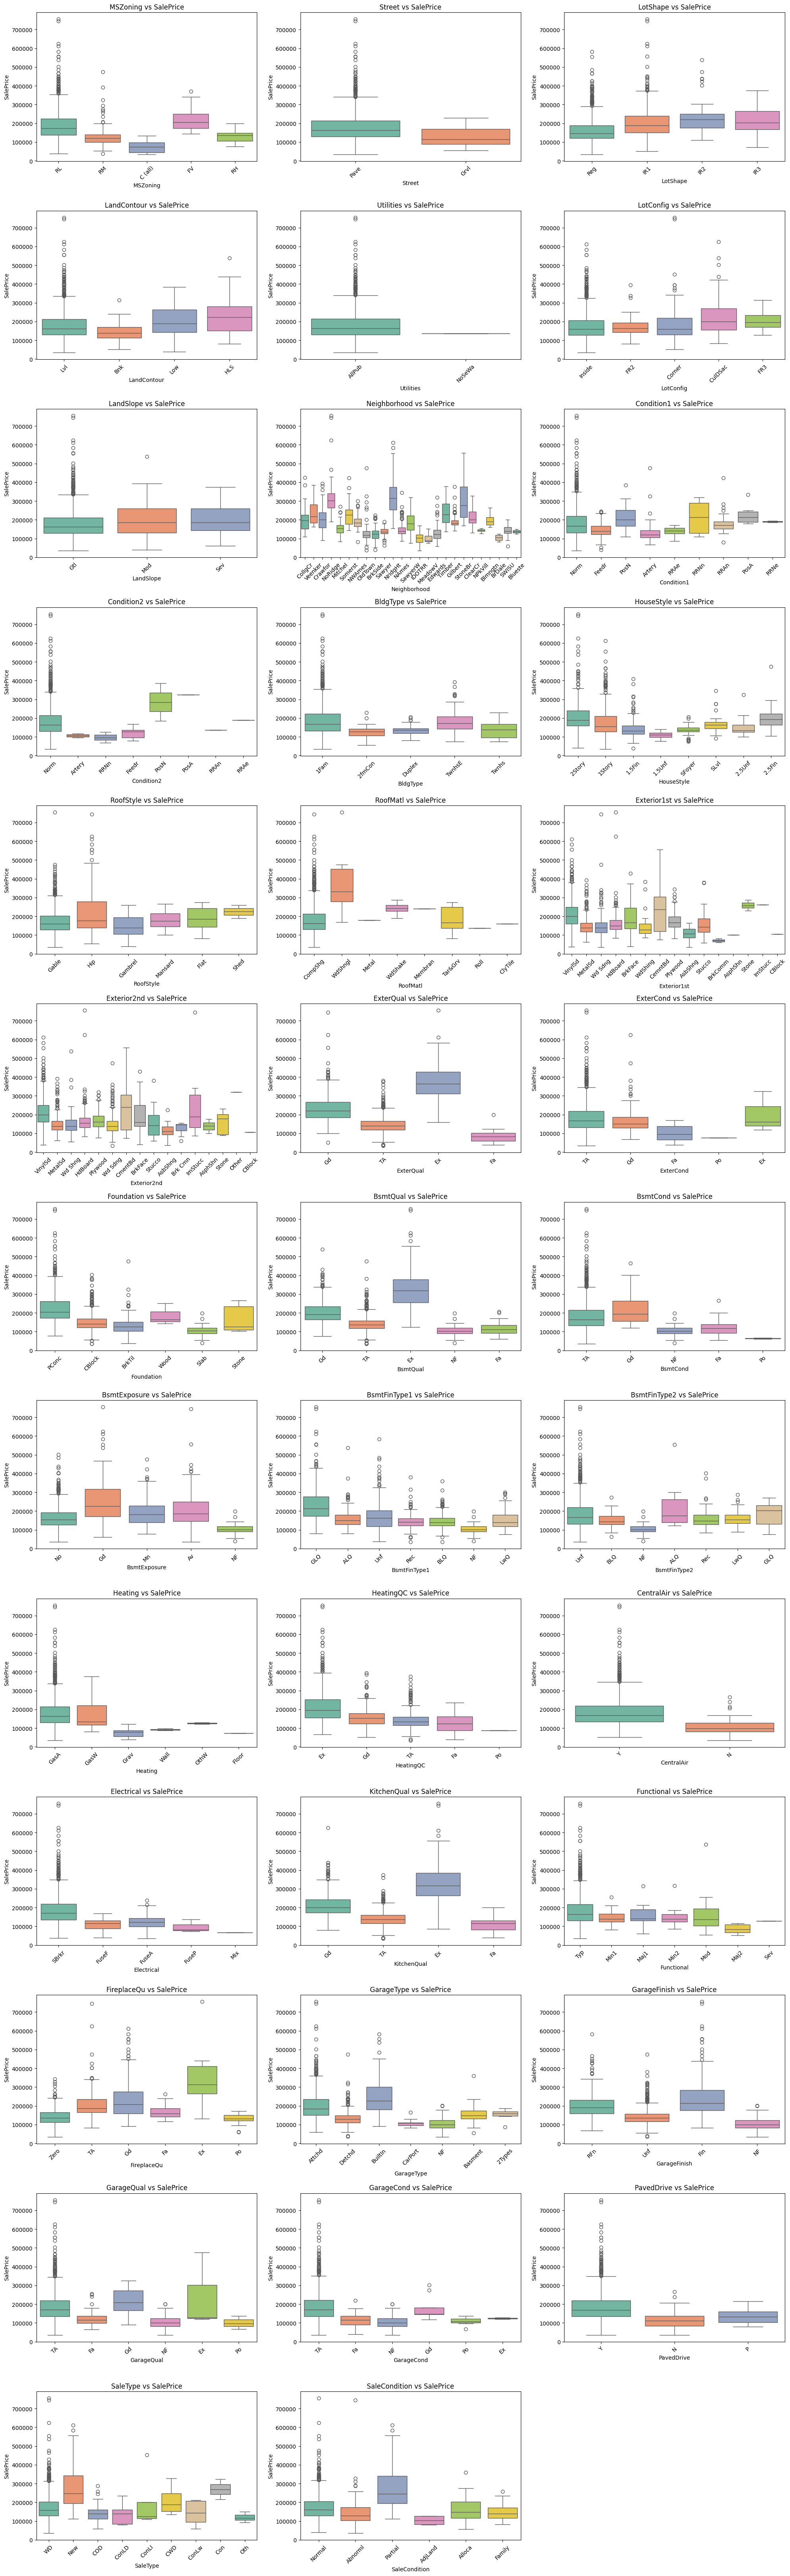

In [41]:
# categorical vs SalePrice
cols_per_row = 3
num_plots = len(cat_cols)
rows = int(np.ceil(num_plots / cols_per_row))

plt.figure(figsize=(20, 5 * rows))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(rows, cols_per_row, i)
    sns.boxplot(data=train, x=col, y='SalePrice', hue=col, palette='Set2', legend=False)
    plt.title(f'{col} vs SalePrice')
    plt.xticks(rotation=45)
    plt.tight_layout()
plt.show()

## Multivariate analysis

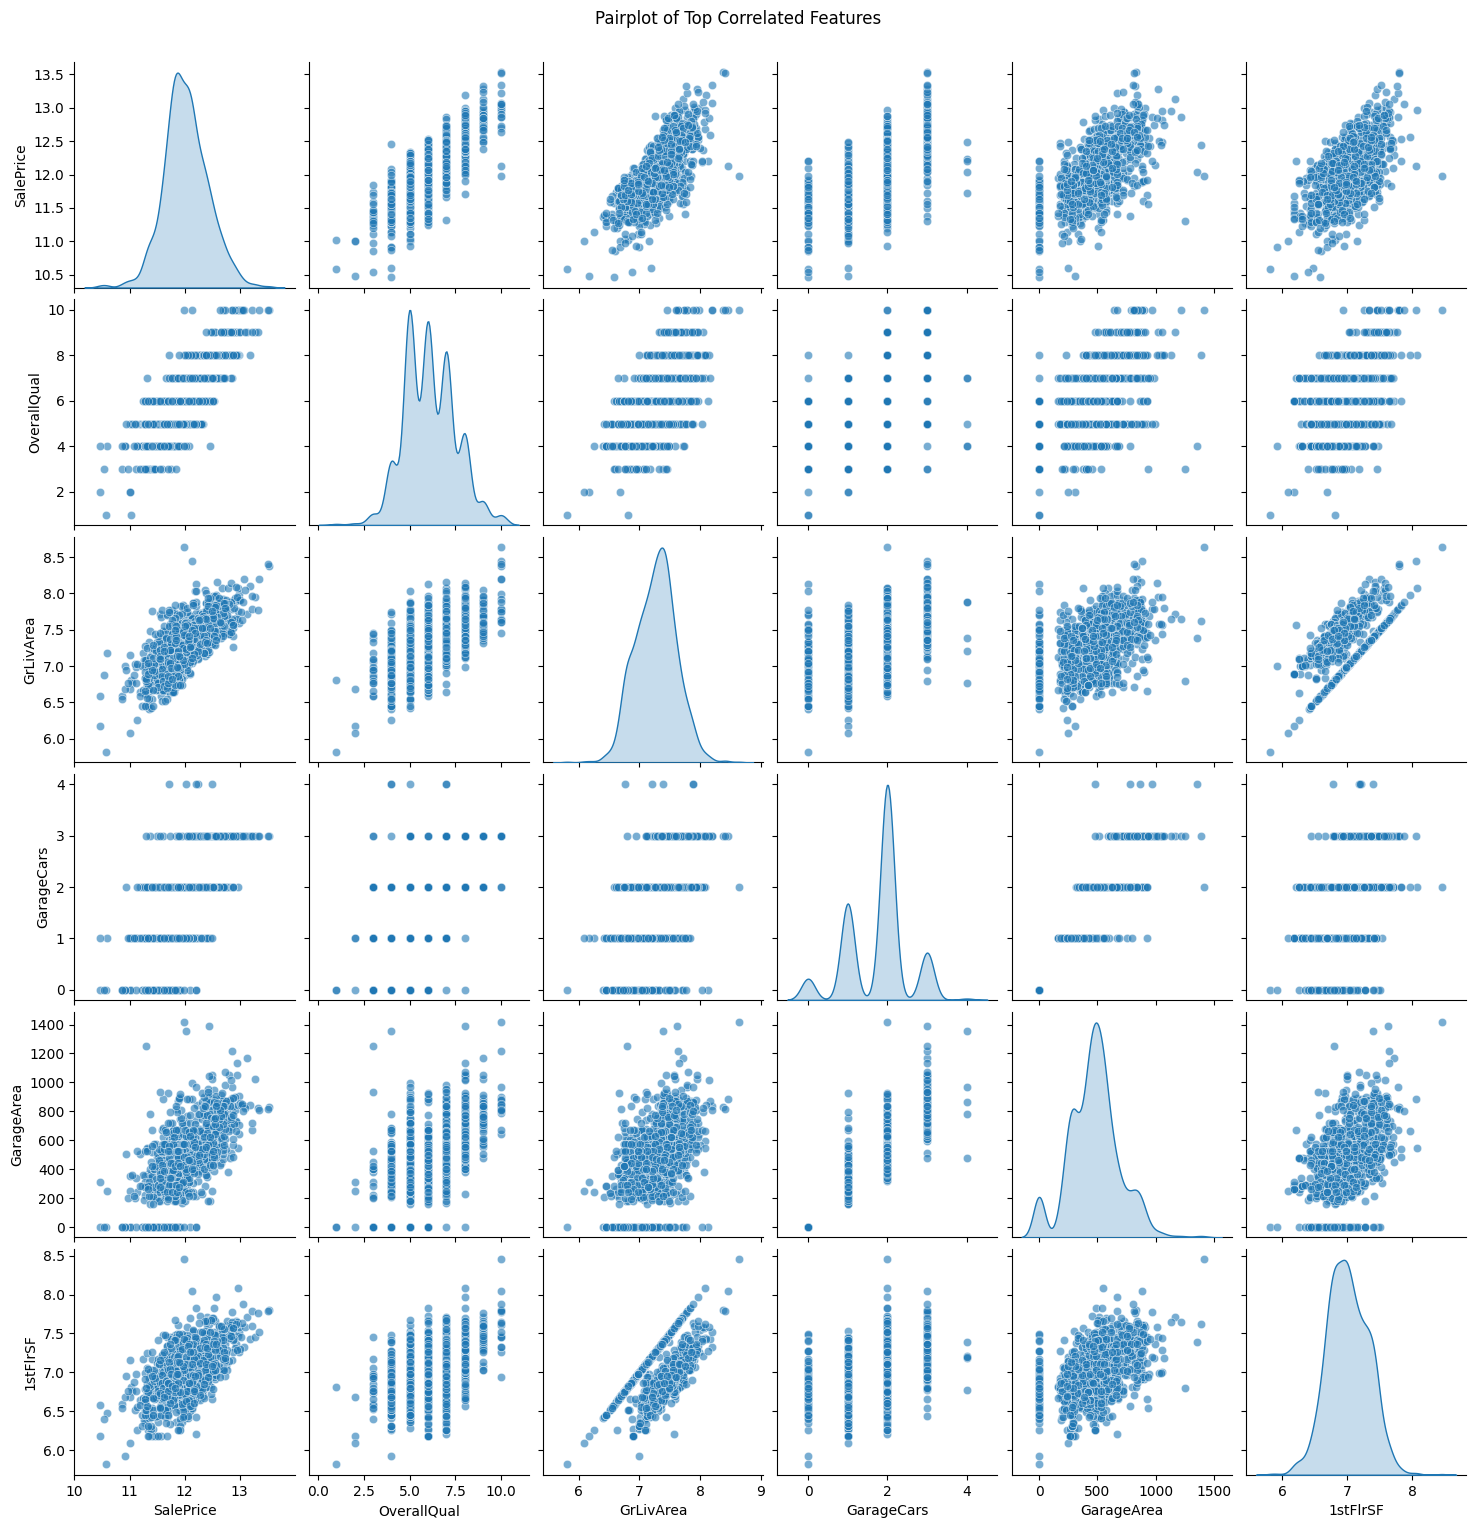

In [55]:
# Pairplot for top correlated numeric variables
corr_matrix = train.corr(numeric_only=True)

top_corr = corr_matrix['SalePrice'].abs().sort_values(ascending=False).head(6).index

sns.pairplot(train[top_corr], diag_kind='kde', plot_kws={'alpha':0.6})
plt.suptitle('Pairplot of Top Correlated Features', y=1.02)
plt.show()

## Outliers

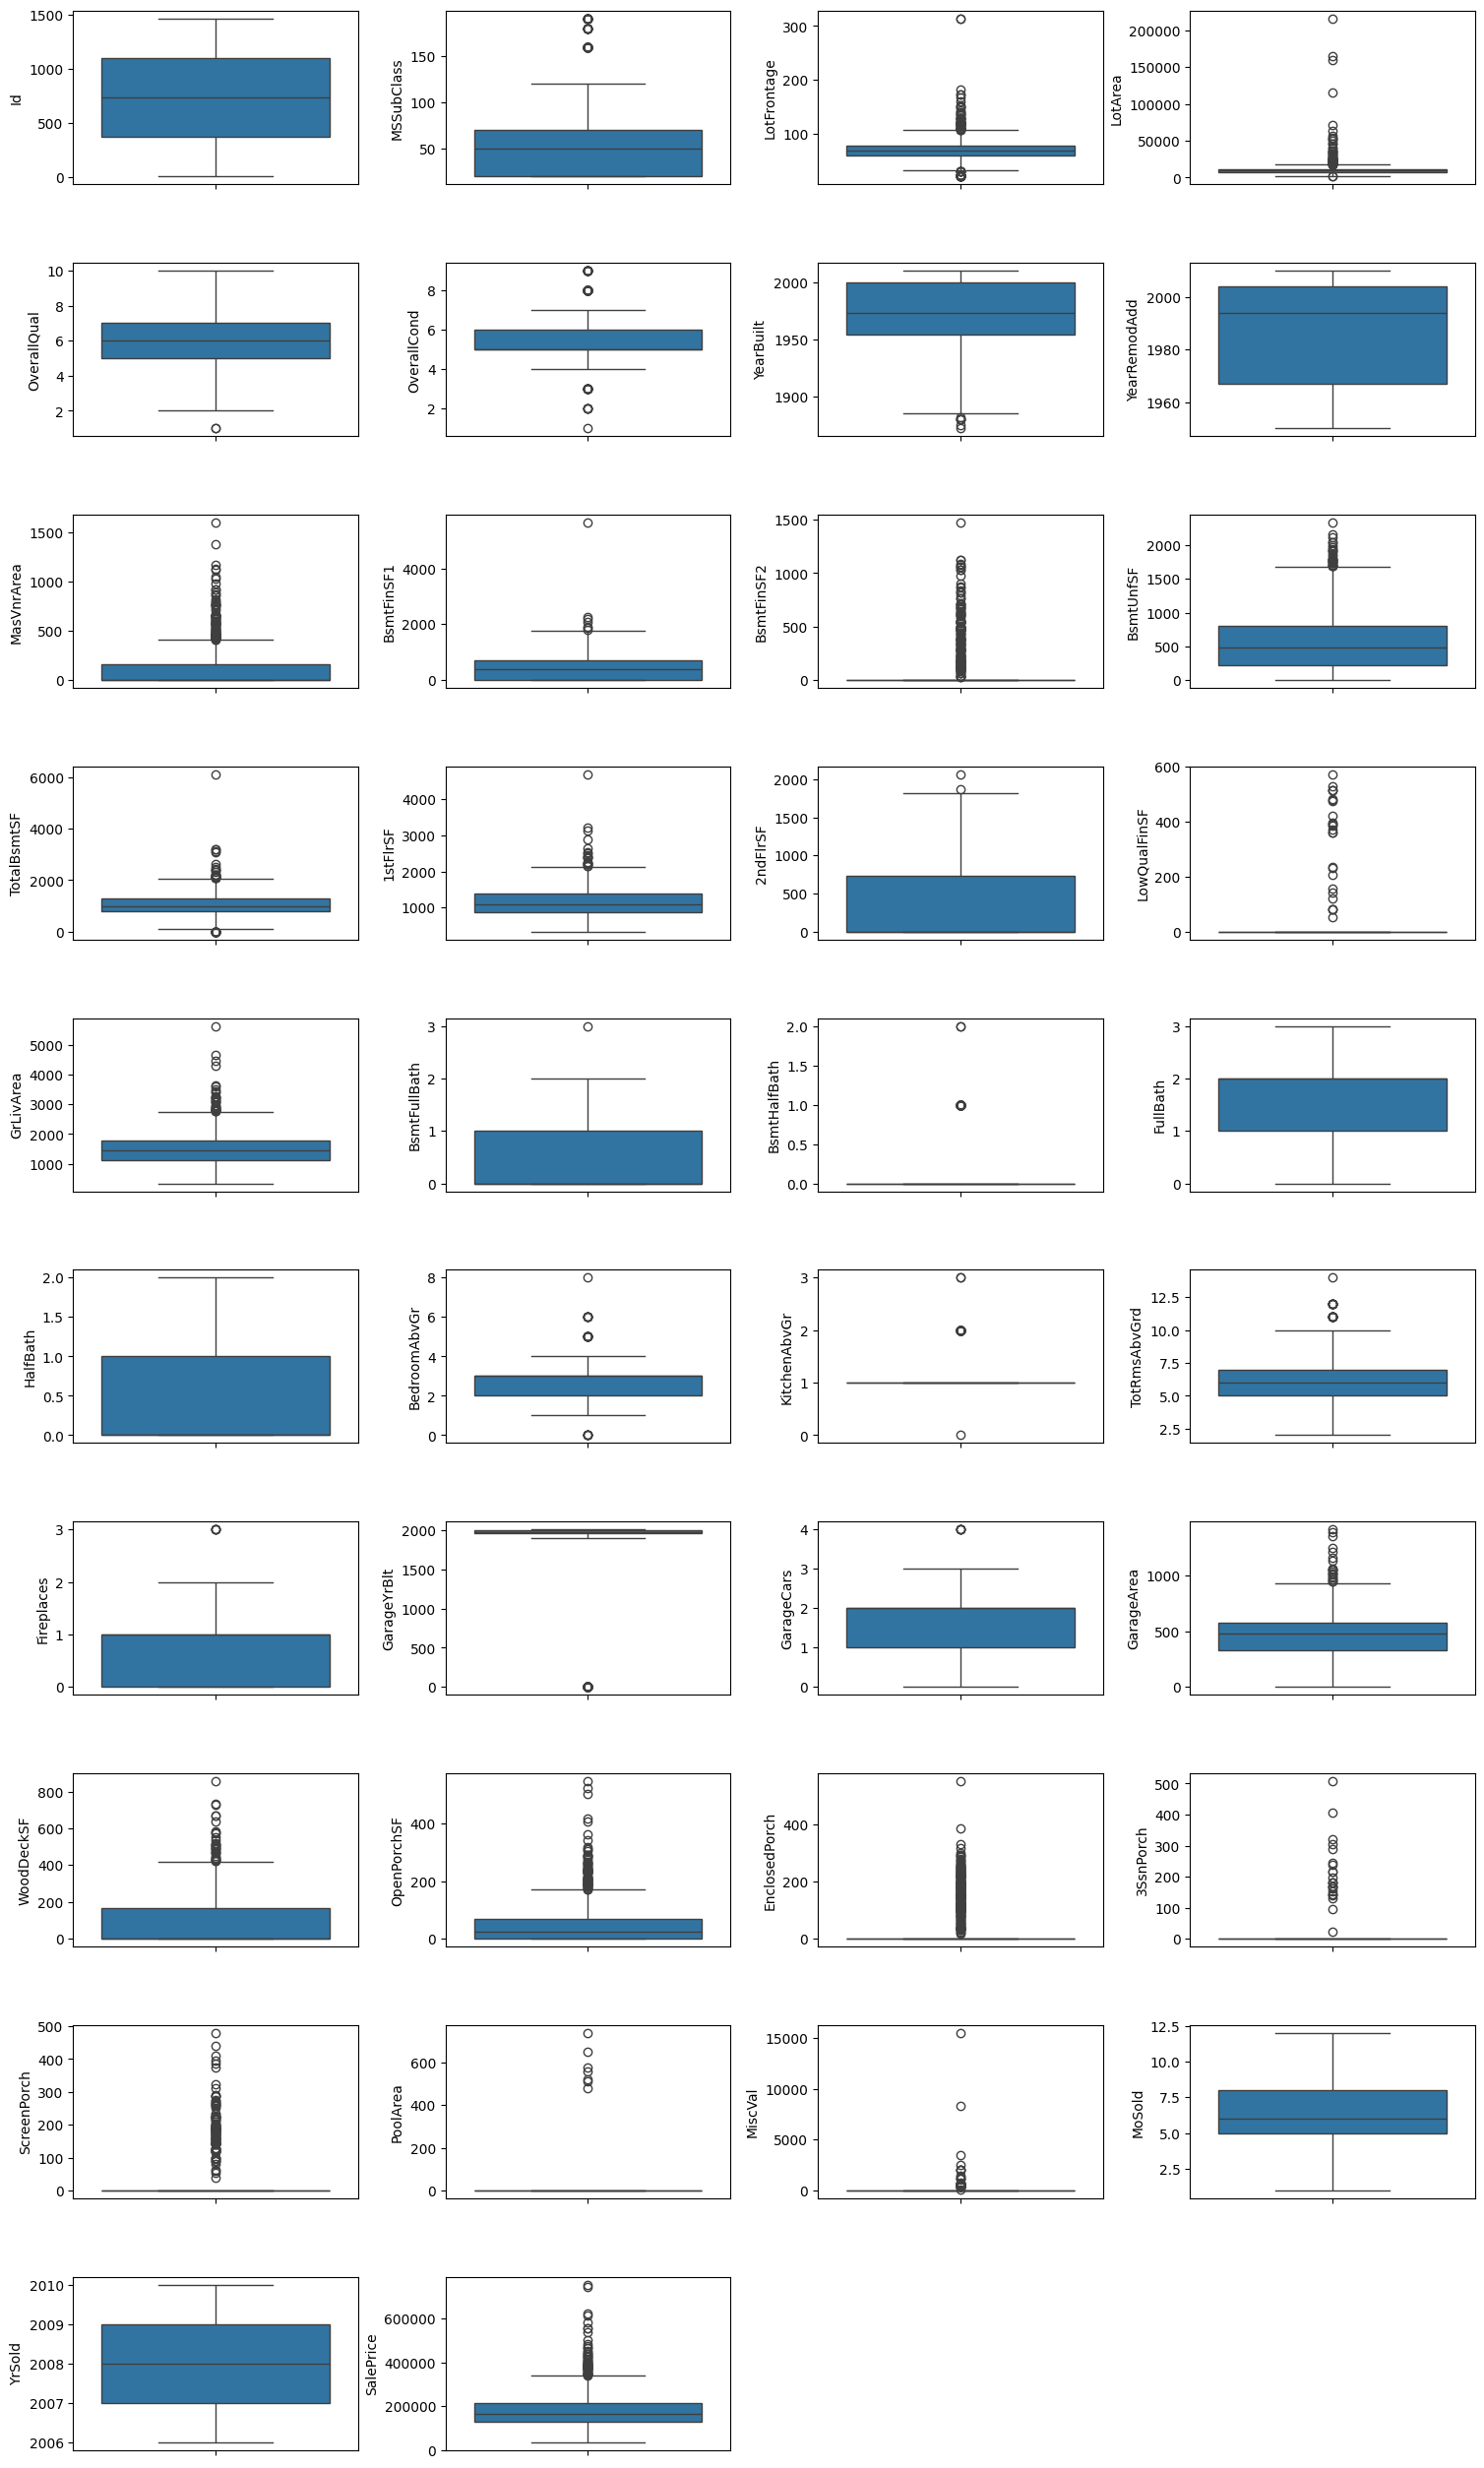

In [43]:
# numeric columns
num_cols = train.select_dtypes(include=np.number).columns.tolist()

cols = 4
rows = math.ceil(len(num_cols) / cols)

fig, axs = plt.subplots(nrows=rows, ncols=cols, figsize=(15, rows * 2.5))
axs = axs.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(y=col, data=train, ax=axs[i])

for j in range(i + 1, len(axs)):
    axs[j].set_visible(False)

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

## Encoding

In [57]:
# encoding
# Ordinal Encoding
qual_mapping = {
    "Ex": 5,
    "Gd": 4,
    "TA": 3,
    "Fa": 2,
    "Po": 1,
    "NF": 0
}

ordinal_cols = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
                'HeatingQC', 'KitchenQual',
                'GarageQual', 'GarageCond']

for col in ordinal_cols:
    train[col] = train[col].fillna('NF').map(qual_mapping)

# Label Encoding
train['FireplaceQu'] = train['FireplaceQu'].fillna('Zero')
le = LabelEncoder()
train['FireplaceQu'] = le.fit_transform(train['FireplaceQu'])

# One-Hot Encoding
nominal_cols = [col for col in cat_cols if col not in ordinal_cols + ['FireplaceQu']]
train = pd.get_dummies(train, columns=nominal_cols, drop_first=True)

In [58]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 217 entries, Id to SaleCondition_Partial
dtypes: bool(170), float64(12), int64(35)
memory usage: 778.6 KB


# Feature engineering

In [59]:
# Total Square Footage
train['TotalSF'] = train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF']

# Total Bathrooms
train['Total_Bathrooms'] = (train['FullBath'] + (0.5 * train['HalfBath']) +
                               train['BsmtFullBath'] + (0.5 * train['BsmtHalfBath']))

# House Age Features
train['RemodAge'] = train['YrSold'] - train['YearRemodAdd']
train['HouseAge'] = train['YrSold'] - train['YearBuilt']

# Quality × Size Interaction
train['OverallQualArea'] = train['OverallQual'] * train['TotalSF']

In [61]:
train.to_csv("processed_train.csv", index=False)

In [62]:
train.shape

(1460, 222)